In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from termcolor import colored


In [17]:
# Ladda datasetet
file_path = r"C:\Users\omard\OneDrive\Skrivbord\Telco_customer_churn.xlsx"
data = pd.read_excel(file_path)

# Visa de första raderna
data.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [7]:
# Kontrollera om det finns saknade värden i datasetet
print("\nFinns det några saknade värden i datasetet?")
print(data.isnull().sum())

# Ta bort rader med saknade värden
data = data.dropna()

# Bekräfta att saknade värden har tagits bort
print(colored("\nAntal saknade värden efter borttagning?", 'cyan'))
print(data.isnull().sum())


Finns det några saknade värden i datasetet?
CustomerID           0
Count                0
Country              0
State                0
City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
Churn Reason         0
dtype: int64

Antal saknade värden efter borttagning?
CustomerID           0
Count                0
Country              0
State                0
City                 0
Zip Code             0
Lat 

In [8]:
# Skapa en instans av LabelEncoder
encoder = LabelEncoder()

# Lista alla kategoriska kolumner
categorical_columns = data.select_dtypes(include=['object']).columns

# Omvandla varje kategorisk kolumn till numeriska värden
for column in categorical_columns:
    if data[column].dtype == 'object':  # Kontrollera om det är en kategorisk kolumn
        data[column] = data[column].apply(lambda x: str(x) if isinstance(x, str) else 'Unknown')  # Rensa eventuella icke-strängvärden
        data[column] = encoder.fit_transform(data[column])  # Omvandla till numeriska värden

# Kontrollera datatyper efter omvandlingen
print(colored("\nDatatyper för alla kolumner efter omvandling:", 'cyan'))
print(data.dtypes)




Datatyper för alla kolumner efter omvandling:
CustomerID             int32
Count                  int64
Country                int32
State                  int32
City                   int32
Zip Code               int64
Lat Long               int32
Latitude             float64
Longitude            float64
Gender                 int32
Senior Citizen         int32
Partner                int32
Dependents             int32
Tenure Months          int64
Phone Service          int32
Multiple Lines         int32
Internet Service       int32
Online Security        int32
Online Backup          int32
Device Protection      int32
Tech Support           int32
Streaming TV           int32
Streaming Movies       int32
Contract               int32
Paperless Billing      int32
Payment Method         int32
Monthly Charges      float64
Total Charges          int32
Churn Label            int32
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason           in

In [9]:

# Ta bort  kolumner som 'CustomerID' och 'Churn Reason'
features = data.drop(['Churn Label', 'CustomerID', 'Churn Reason'], axis=1)

# Målvariabeln 'Churn Label'
target = data['Churn Label']  # 'Churn Label' är målvariabeln

# Dela upp data i tränings- och testuppsättningar (80% träning, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Kontrollera storleken på tränings- och testuppsättningar
print("Träningsuppsättning: ", X_train.shape)
print("Testuppsättning: ", X_test.shape)


Träningsuppsättning:  (1495, 30)
Testuppsättning:  (374, 30)


In [10]:
# Bygg och träna en Random Forest-modell
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Bekräfta att modellen har tränats
print("Modellen har tränats.")


Modellen har tränats.


In [19]:
# förutsägelser på testuppsättningen
predictions = random_forest_model.predict(X_test)

# Utvärdera modellens prestanda
print("\nModellens noggrannhet:")
print(accuracy_score(y_test, predictions))

# Förvirringsmatris
print("\nFörvirringsmatris:")
print(confusion_matrix(y_test, predictions))

# Klassificeringsrapport
print("\nKlassificeringsrapport:")
print(classification_report(y_test, predictions))



Modellens noggrannhet:
1.0

Förvirringsmatris:
[[374]]

Klassificeringsrapport:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       374

    accuracy                           1.00       374
   macro avg       1.00      1.00      1.00       374
weighted avg       1.00      1.00      1.00       374



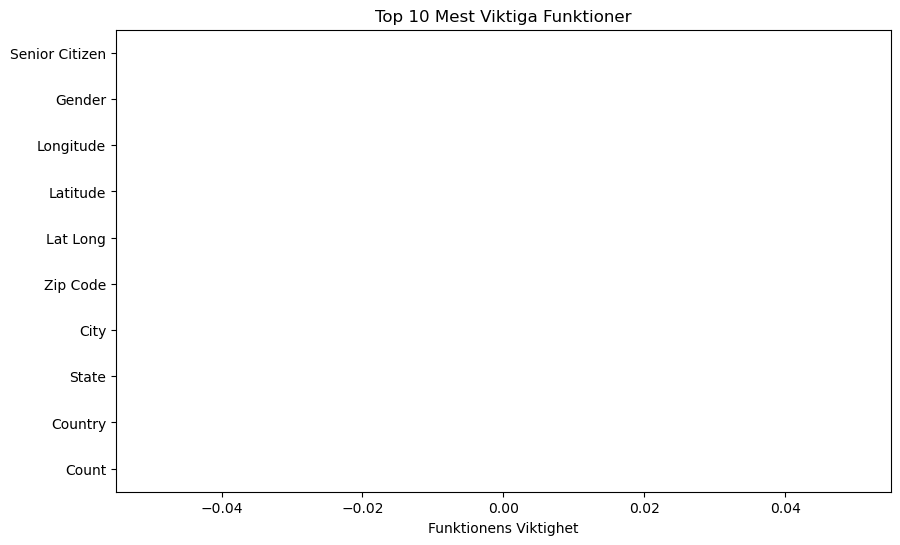

In [18]:
# Visualisering av top 10 funktionerna
feature_importances = pd.Series(random_forest_model.feature_importances_, index=features.columns)
plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Mest Viktiga Funktioner')
plt.xlabel('Funktionens Viktighet')
plt.show()


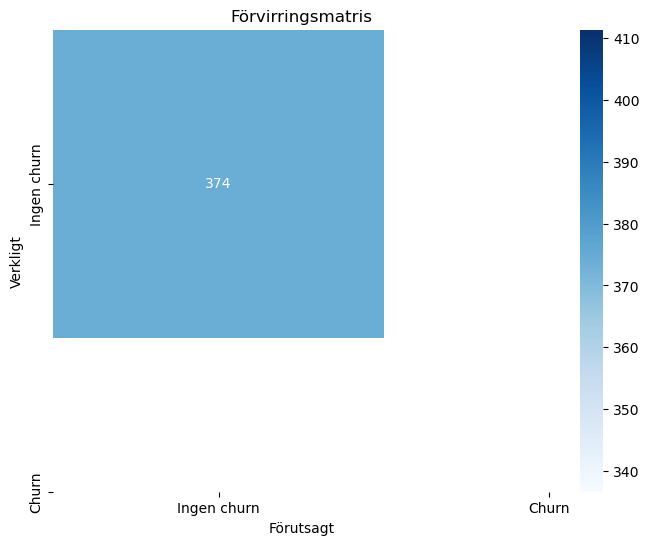

In [14]:
# Förvirringsmatris Heatmap
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ingen churn', 'Churn'], yticklabels=['Ingen churn', 'Churn'])
plt.title('Förvirringsmatris')
plt.xlabel('Förutsagt')
plt.ylabel('Verkligt')
plt.show()
